In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2082,ham,I'm done oredi...,NaN,NaN,NaN
2537,ham,That's y we haf to combine n c how lor...,NaN,NaN,NaN
3263,ham,I will send them to your email. Do you mind &...,NaN,NaN,NaN
4687,ham,Hmmm.but you should give it on one day..,NaN,NaN,NaN
2397,ham,Neshanth..tel me who r u?,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. data cleaning
# 2. EDA
# 3. Text Preprocesssing
# 4. Model Building
# 5. Evaluatiom
# 6. Improvement
# 7. Website Building

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace = True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:

#renaming the cols
df.rename(columns = {'v1': 'is_spam', 'v2': 'message'}, inplace =True)

In [10]:

df.head()

,is_spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['is_spam'] = lb.fit_transform(df['is_spam'])

In [12]:
df.head()

,is_spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# checking missing values
df.isnull().sum()

is_spam    0
message    0
dtype: int64

In [14]:
# checking duplicates
df.duplicated().sum()

403

In [15]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# Exploratory Data Analysis (EDA)

In [18]:
df.head()

,is_spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['is_spam'].value_counts()

is_spam
0    4516
1     653
Name: count, dtype: int64

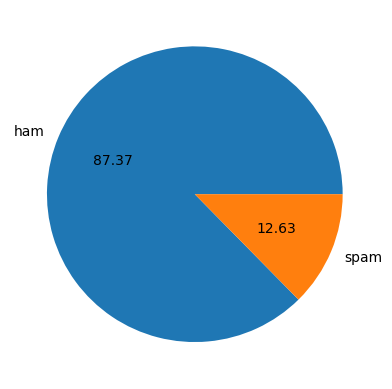

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['is_spam'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [21]:
#Data is imbalanced not uniform so model can be biased towards ham if we dont analyse and process the data very well

In [22]:
# now we are going to deep analyse no. of words , characters , sentences in messages column that implies Natural Language Processing NLP
# we are going to make additional three columns no.of char,no. of words, no. of sentences and for this we are going to use nltk library

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['message'].apply(len)

In [26]:
df.head()

,is_spam,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#num of words nltk.word_tokenize breaks or tokenizethe message on the basis of words
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.message[1]

'Ok lar... Joking wif u oni...'

In [29]:
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,is_spam,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['is_spam'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['is_spam'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

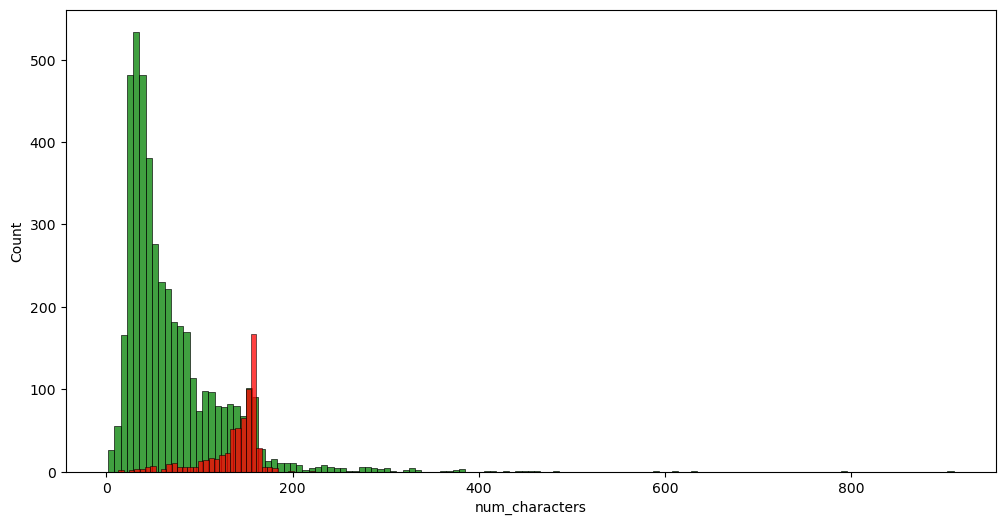

In [35]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['is_spam'] == 0]['num_characters'], color = 'green')
sns.histplot(df[df['is_spam'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

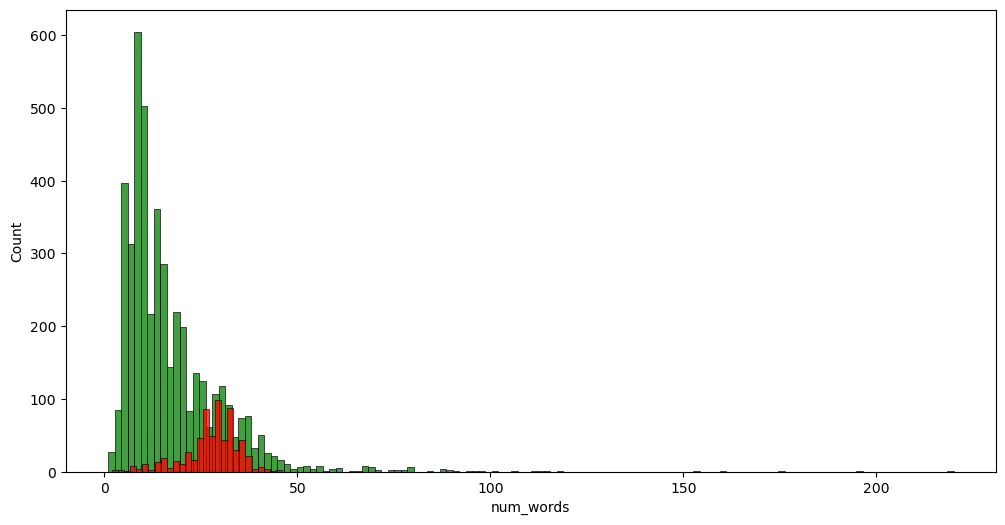

In [36]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['is_spam'] == 0]['num_words'], color = 'green')
sns.histplot(df[df['is_spam'] == 1]['num_words'], color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

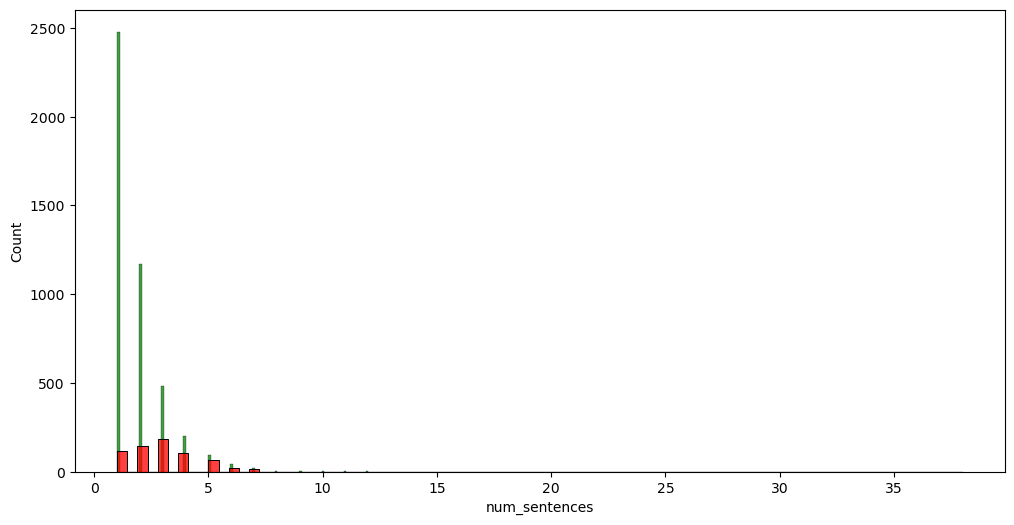

In [37]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['is_spam'] == 0]['num_sentences'], color = 'green')
sns.histplot(df[df['is_spam'] == 1]['num_sentences'], color = 'red')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


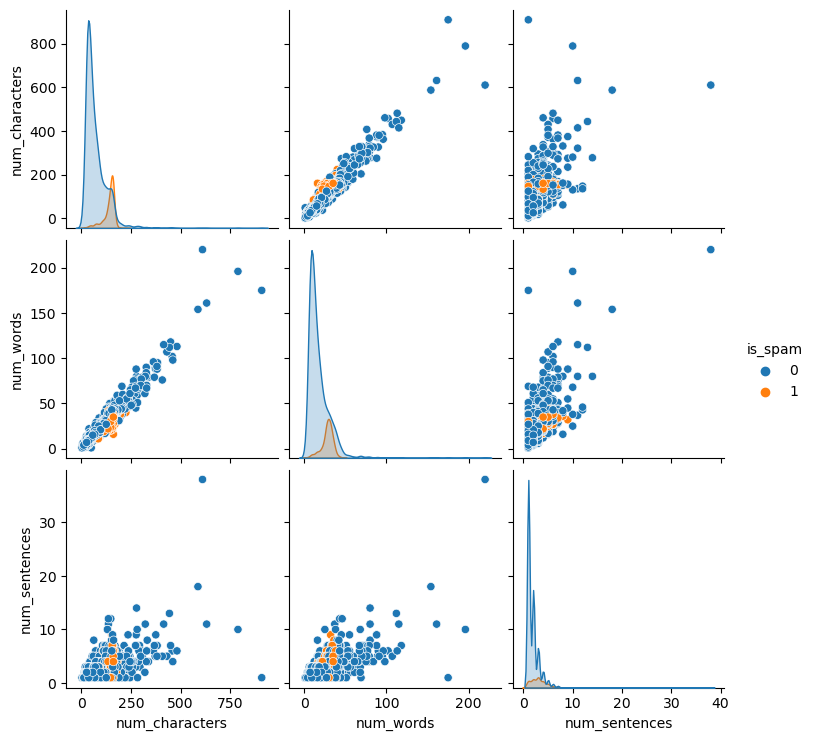

In [38]:
sns.pairplot(df, hue = 'is_spam')

<Axes: >

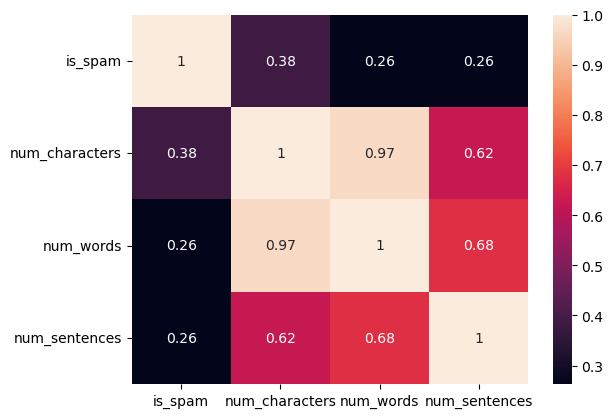

In [39]:
sns.heatmap(df[['is_spam', 'num_characters', 'num_words', 'num_sentences']].corr(), annot = True)

# Data Preprocessing
   Lower Case
   Tokenization
   Removing special characters
   Removing stopwords and punctuation
   Stemming

In [40]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
     
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:] #here we are cloning
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:] #here we are cloning
    y.clear()      
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [44]:
df['transformed_message'] = df['message'].apply(transform_text)


In [45]:
df.head()

,is_spam,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')

In [47]:
spam_wc = wc.generate(df[df['is_spam'] == 1]['transformed_message'].str.cat(sep = ' '))

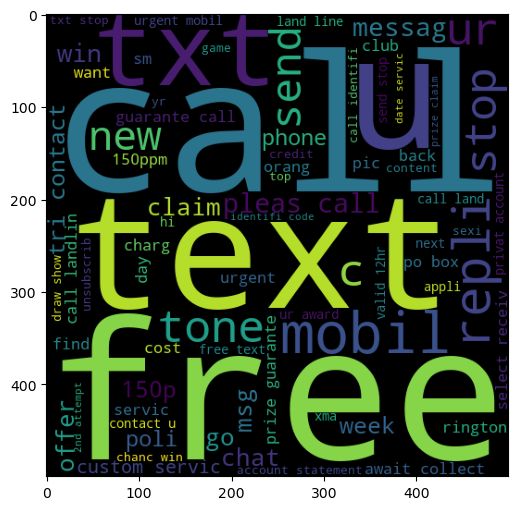

In [48]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['is_spam'] == 0]['transformed_message'].str.cat(sep = ' '))

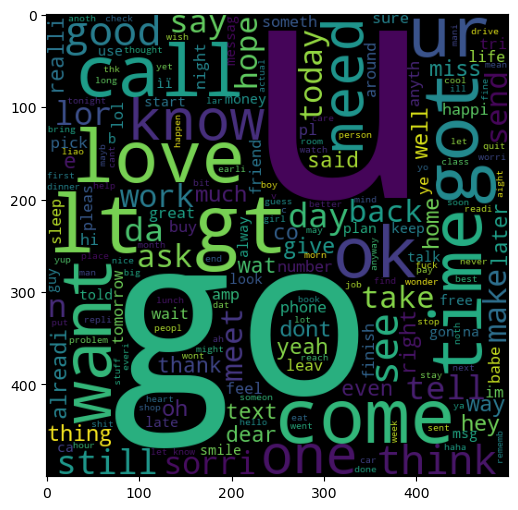

In [50]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [51]:
spam_corpus = []
for msg in df[df['is_spam'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

9939

In [53]:
from collections import Counter
words_count = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [54]:
#words_count.rename(columns = {'0': 'words', '1': 'count'}, inplace =True)
#df.drop(columns = [words_count[0], words_count[1]],inplace = True)

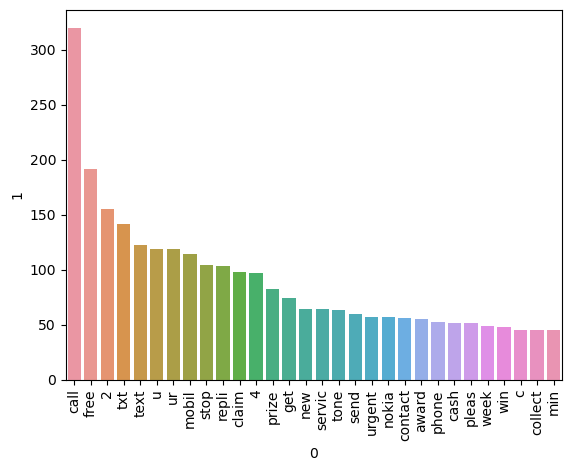

In [55]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [56]:
words_count

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [57]:
ham_corpus = []
for msg in df[df['is_spam'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35404

In [59]:
words_hamcount = pd.DataFrame(Counter(ham_corpus).most_common(30))

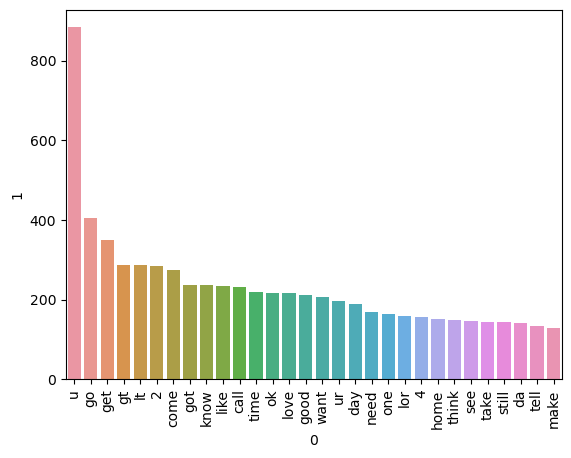

In [60]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [61]:
# vectorizing the transformed message
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features = 3000)
tfidf = TfidfVectorizer(max_features = 3000)

In [62]:
X1 = tfidf.fit_transform(df['transformed_message']).toarray()

In [63]:
X2 = cv.fit_transform(df['transformed_message']).toarray()

In [64]:
# X1 = np.hstack((X1,df['num_characters'].values.reshape(-1,1)))
# X2 = np.hstack((X2,df['num_characters'].values.reshape(-1,1)))
# # arr = np.hstack((X1[1],29))

In [65]:
print(X1.shape)
print(X2.shape)
# print(X1[1])
# print(arr)
# print(len(X1[1]))

(5169, 3000)
(5169, 3000)


In [66]:
y = df['is_spam'].values

In [67]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [68]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.2, random_state = 2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.2, random_state = 2)

In [69]:
# from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [70]:
# gnb = GaussianNB()
# mnb = MultinomialNB()
# bnb = BernoulliNB()

In [71]:
# gnb.fit(X_train1, y_train1)
# mnb.fit(X_train1, y_train1)
# bnb.fit(X_train1, y_train1)
# y_pred1 = gnb.predict(X_test1)
# y_pred2 = mnb.predict(X_test1)
# y_pred3 = bnb.predict(X_test1)

In [72]:
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
# cm1 = confusion_matrix(y_test1, y_pred1)
# cm2 = confusion_matrix(y_test1, y_pred2)
# cm3 = confusion_matrix(y_test1, y_pred3)
# as1 = accuracy_score(y_test1, y_pred1)
# as2 = accuracy_score(y_test1, y_pred2)
# as3 = accuracy_score(y_test1, y_pred3)
# ps1 = precision_score(y_test1, y_pred1)
# ps2 = precision_score(y_test1, y_pred2)
# ps3 = precision_score(y_test1, y_pred3)

In [73]:
# #for gaussian naive bayes
# print(cm1)
# print(as1)
# print(ps1)

In [74]:
# #for multinomial naive bayes
# print(cm2)
# print(as2)
# print(ps2)

In [75]:
# #for Bernoulli naive bayes
# print(cm3)
# print(as3)
# print(ps3)

In [76]:
#tfidf --> mnb

In [77]:
!pip install xgboost


In [78]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [79]:
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth = 5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gdbt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [80]:
clfs = {
    'LR' : lrc,
    'SVC' : svc,
    'GNB' : gnb,
    'MNB' : mnb,
    'BNB' : bnb,
    'DT' : dtc,
    'KN' : knc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GDBT' : gdbt,
    'xgb' :xgb
}

In [81]:
def train_classifier_tfidf(clf, X_train1, y_train1, X_test1, y_test1):
    clf.fit(X_train1, y_train1)
    y_pred1 = clf.predict(X_test1)
    accuracy1 = accuracy_score(y_test1, y_pred1)
    precision1 = precision_score(y_test1, y_pred1)
    
    return accuracy1, precision1

In [82]:
train_classifier_tfidf(svc, X_train1, y_train1, X_test1, y_test1 )

(0.9758220502901354, 0.9747899159663865)

In [83]:
accuracy_scores_tfidf = []
precision_scores_tfidf = []

for name,clf in clfs.items():
    current_accuracy1, current_precision1 = train_classifier_tfidf(clf, X_train1, y_train1, X_test1, y_test1)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy1)
    print("Precision - ", current_precision1)
    
    accuracy_scores_tfidf.append(current_accuracy1)
    precision_scores_tfidf.append(current_precision1)

For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  GNB
Accuracy -  0.8694390715667312
Precision -  0.5068493150684932
For  MNB
Accuracy -  0.9709864603481625
Precision -  1.0
For  BNB
Accuracy -  0.9835589941972921
Precision -  0.991869918699187
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GDBT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [84]:
def train_classifier_cv(clf, X_train2, y_train2, X_test2, y_test2):
    clf.fit(X_train2, y_train2)
    y_pred2 = clf.predict(X_test2)
    accuracy2 = accuracy_score(y_test2, y_pred2)
    precision2 = precision_score(y_test2, y_pred2)
    
    return accuracy2, precision2

In [85]:
train_classifier_cv(svc, X_train2, y_train2, X_test2, y_test2 )

(0.9284332688588007, 0.753968253968254)

In [86]:
accuracy_scores_cv = []
precision_scores_cv = []

for name,clf in clfs.items():
    current_accuracy2, current_precision2 = train_classifier_cv(clf, X_train2, y_train2, X_test2, y_test2)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy2)
    print("Precision - ", current_precision2)
    
    accuracy_scores_cv.append(current_accuracy2)
    precision_scores_cv.append(current_precision2)

For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  SVC
Accuracy -  0.9284332688588007
Precision -  0.753968253968254
For  GNB
Accuracy -  0.874274661508704
Precision -  0.5176991150442478
For  MNB
Accuracy -  0.971953578336557
Precision -  0.8865248226950354
For  BNB
Accuracy -  0.9835589941972921
Precision -  0.991869918699187
For  DT
Accuracy -  0.9264990328820116
Precision -  0.9428571428571428
For  KN
Accuracy -  0.9110251450676983
Precision -  1.0
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9385964912280702
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.9016393442622951
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GDBT
Accuracy -  0.9448742746615088
Precision -  0.945054945054945
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [87]:
performance_df_chars = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy(tfidf)_max3k_chars' : accuracy_scores_tfidf, 'Accuracy(cv)_max3k_chars' : accuracy_scores_cv,  'Precison(tfidf)_max3k_chars' : precision_scores_tfidf, 'Precison(cv)_max3k_chars' : precision_scores_cv  }).sort_values('Precison(tfidf)_max3k_chars', ascending = False)
# performance_cv_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores_cv, 'Precison' : precision_scores_cv })

In [88]:
performance_df_chars
#performance_df

,Algorithm,Accuracy(tfidf)_max3k_chars,Accuracy(cv)_max3k_chars,Precison(tfidf)_max3k_chars,Precison(cv)_max3k_chars
3,MNB,0.970986,0.971954,1.000000,0.886525
6,KN,0.905222,0.911025,1.000000,1.000000
4,BNB,0.983559,0.983559,0.991870,0.991870
7,RF,0.975822,0.973888,0.982906,0.982609
1,SVC,0.975822,0.928433,0.974790,0.753968
10,ETC,0.974855,0.977756,0.974576,0.983193
0,LR,0.958414,0.970986,0.970297,0.973684
8,AdaBoost,0.960348,0.963250,0.929204,0.938596
12,xgb,0.967118,0.973888,0.926230,0.966387
11,GDBT,0.946809,0.944874,0.919192,0.945055


In [90]:
 performance_df1 = pd.melt(performance_df_chars, id_vars = "Algorithm")

In [91]:
performance_df1
# performance_df1

,Algorithm,variable,value
0,MNB,Accuracy(tfidf)_max3k_chars,0.970986
1,KN,Accuracy(tfidf)_max3k_chars,0.905222
2,BNB,Accuracy(tfidf)_max3k_chars,0.983559
3,RF,Accuracy(tfidf)_max3k_chars,0.975822
4,SVC,Accuracy(tfidf)_max3k_chars,0.975822
5,ETC,Accuracy(tfidf)_max3k_chars,0.974855
6,LR,Accuracy(tfidf)_max3k_chars,0.958414
7,AdaBoost,Accuracy(tfidf)_max3k_chars,0.960348
8,xgb,Accuracy(tfidf)_max3k_chars,0.967118
9,GDBT,Accuracy(tfidf)_max3k_chars,0.946809


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

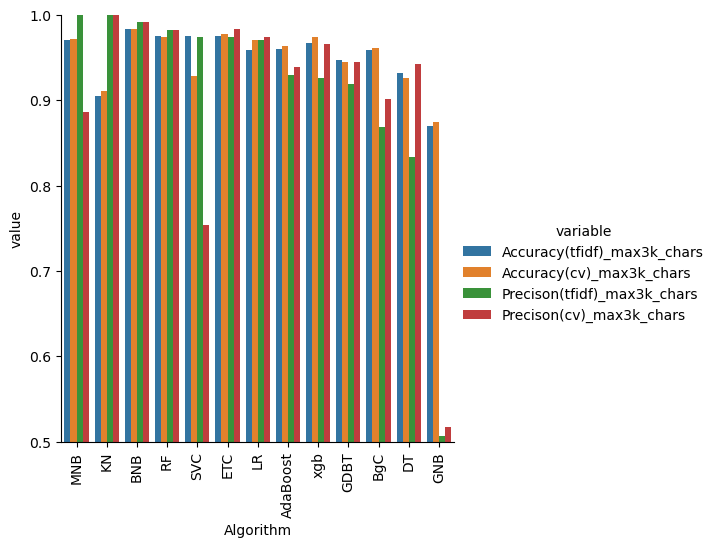

In [92]:
plt.figure(figsize = (10,5))
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [94]:
# # trying to improve the model
# #1. changing the max_features parameter of tfidf and cv
# cv1 = CountVectorizer(max_features = 3000)
# tfidf1 = TfidfVectorizer(max_features = 3000)

In [95]:
# X3 = tfidf1.fit_transform(df['transformed_message']).toarray()
# X4 = cv1.fit_transform(df['transformed_message']).toarray()

In [96]:
# from sklearn.preprocessing import MinMaxScaler
# scaler1 = MinMaxScaler()
# scaler2 = MinMaxScaler()
# X3 = scaler1.fit_transform(X3)
# X4 = scaler2.fit_transform(X4)

In [97]:
# X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size = 0.2, random_state = 2)
# X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y, test_size = 0.2, random_state = 2)

In [98]:
# def train_classifier_tfidf1(clf, X_train3, y_train3, X_test3, y_test3):
#     clf.fit(X_train3, y_train3)
#     y_pred3 = clf.predict(X_test3)
#     accuracy3 = accuracy_score(y_test3, y_pred3)
#     precision3 = precision_score(y_test3, y_pred3)
    
#     return accuracy3, precision3

In [99]:
# def train_classifier_cv1(clf, X_train4, y_train4, X_test4, y_test4):
#     clf.fit(X_train4, y_train4)
#     y_pred4 = clf.predict(X_test4)
#     accuracy4 = accuracy_score(y_test4, y_pred4)
#     precision4 = precision_score(y_test4, y_pred4)
    
#     return accuracy4, precision4

In [100]:
# accuracy_scores_tfidf1 = []
# precision_scores_tfidf1 = []

# for name,clf in clfs.items():
#     current_accuracy3, current_precision3 = train_classifier_tfidf1(clf, X_train3, y_train3, X_test3, y_test3)
    
#     print("For ", name)
#     print("Accuracy - ", current_accuracy3)
#     print("Precision - ", current_precision3)
    
#     accuracy_scores_tfidf1.append(current_accuracy3)
#     precision_scores_tfidf1.append(current_precision3)

In [101]:
# accuracy_scores_cv1 = []
# precision_scores_cv1 = []

# for name,clf in clfs.items():
#     current_accuracy4, current_precision4 = train_classifier_cv1(clf, X_train4, y_train4, X_test4, y_test4)
    
#     print("For ", name)
#     print("Accuracy - ", current_accuracy4)
#     print("Precision - ", current_precision4)
    
#     accuracy_scores_cv1.append(current_accuracy4)
#     precision_scores_cv1.append(current_precision4)

In [102]:
# performance_df_max3000_scale = pd.DataFrame({'Algorithm' : clfs.keys(), 'Acc(tfidf)_max3000_scale' : accuracy_scores_tfidf1, 'Acc(cv)_max3000_scale' : accuracy_scores_cv1,  'Pre(tfidf)_max3000_scale' : precision_scores_tfidf1, 'Pre(cv)_max3000_scale' : precision_scores_cv1  }).sort_values('Pre(tfidf)_max3000_scale', ascending = False)

In [103]:
# performance_df_max3000_scale
# # performance_df_max3000_scale

In [104]:
# temp_performance = performance_df.merge(performance_df_max3000, on = 'Algorithm')

In [105]:
# temp_performance
# # temp_performance

In [106]:
# final_perf_df = temp_performance.merge(performance_df_max3000_scale, on = 'Algorithm')

In [107]:
# final_perf_df
# # final_perf_df

In [108]:
# end_perf_df = final_perf_df.merge(performance_df_chars, on = 'Algorithm')

In [109]:
# end_perf_df

In [110]:
# #Voting Classifier
# svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

# from sklearn.ensemble import VotingClassifier

In [111]:
# voting1 = VotingClassifier(estimators = [('svm', svc), ('nb', mnb), ('et', etc)], voting = 'soft')
# voting2 = VotingClassifier(estimators = [('svm', svc), ('nb', mnb), ('et', etc)], voting = 'soft')

In [112]:
# voting1.fit(X_train1, y_train1)
# voting2.fit(X_train2, y_train2)

In [113]:
# y_pred1 = voting1.predict(X_test1)
# y_pred2 = voting2.predict(X_test2)



# print('Accuracy_tfidf', accuracy_score(y_test1, y_pred1))
# print('Accuracy_cv', accuracy_score(y_test2, y_pred2))
# print('Precision_tfidf', precision_score(y_test1, y_pred1))
# print('Precision_cv', precision_score(y_test2, y_pred2))

# # best model with 98% accuracy and 100% precision is when we implemented a CountVectorizer() class and stacking the X with num_chars
# # with voting classfier with svm,nb,etc and soft nature voting

In [114]:
# #Applying stacking
# estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator = RandomForestClassifier()

In [115]:
# from sklearn.ensemble import StackingClassifier
# clf1 = StackingClassifier(estimators = estimators, final_estimator = final_estimator)
# clf2 = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [116]:
# clf1.fit(X_train1, y_train1)
# clf2.fit(X_train2, y_train2)

In [117]:
# y_pred1 = clf1.predict(X_test1)
# y_pred2 = clf2.predict(X_test2)
# print('Accuracy_tfidf', accuracy_score(y_test1, y_pred1))
# print('Accuracy_cv', accuracy_score(y_test2, y_pred2))
# print('Precision_tfidf', precision_score(y_test1, y_pred1))
# print('Precision_cv', precision_score(y_test2, y_pred2))

In [118]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))